In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2, random_state=11)
#Decisionclassifier 학습.
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

#export_grapghviz()의 호출결과로  out_file로 지정된 tree.dot파일 생성함
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,
               feature_names= iris_data.feature_names,impurity=True,filled=True)

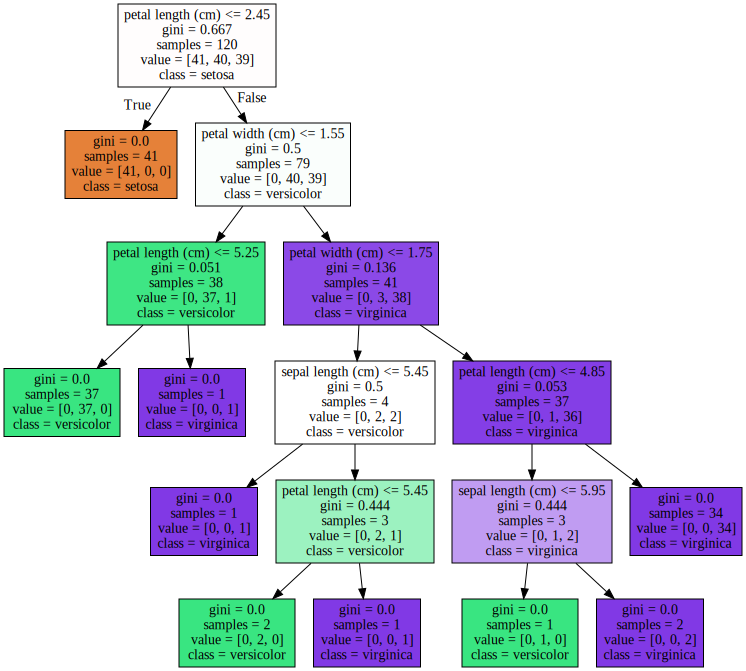

In [6]:
import graphviz
#위에서 생성된 tree.dot파일을 graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot")as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<AxesSubplot:>

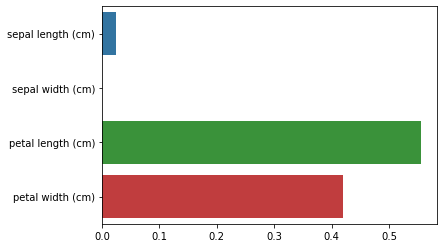

In [9]:
#feature_importances_ 속성 통해 중요한 피쳐 구분
import seaborn as sns
import numpy as np
%matplotlib inline
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))
#feature 별 importance 매핑
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
#feature importance를 컬럼별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드,
feature_name_df=pd.read_csv('C:/Users/dinom/Data-study/UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+',
                           header=None, names=['columns_index','column_name'])
#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])
feature_name_df.head(20)

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,columns_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [30]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name',
                                                           'dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1])
                                                                          if x[1] >0 else x[0],axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [31]:
import pandas as pd
def get_human_dataset():
#각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당.
    feature_name_df=pd.read_csv('C:/Users/dinom/data-study/UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+',header=None,names=['column_index','column_name'])
#중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df=get_new_feature_name_df(feature_name_df)
#DataFrame에 피처명을 칼럼으로 부여하기 위하여 리스트 객체로 다시 변환
    feature_name=new_feature_name_df.iloc[:,1].values.tolist()

#학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명을 feature_name 적용
    X_train=pd.read_csv('C:/Users/dinom/data-study/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+',names=feature_name)
    X_test=pd.read_csv('C:/Users/dinom/data-study/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+',header=None,names=feature_name)

#학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명을 action으로 부여
    y_train=pd.read_csv('C:/Users/dinom/data-study/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test=pd.read_csv('C:/Users/dinom/data-study/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    #로드된 학습/테스트용 DataFrame을 모두 변환
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = get_human_dataset()

In [32]:
print('##학습 피처 데이터셋 info()')
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [33]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [35]:
X_train.isna().sum().sum()

0

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 피라미터 추출 
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도:0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [39]:
from sklearn.model_selection import GridSearchCV
params={
    'max_depth':[6,8,10,12,16,20,24]
}
grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [43]:
#GridSearchCV객체의 cv_results_속성을 DataFrame으로 생성.
cv_results_df=pd.DataFrame(grid_cv.cv_results_)
#max_depth 파라미터 값과 그떄의 테스트,학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [ ]:
max_depths=[6,8,10,12,16,20,24]
#max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth